<img src=https://docs.qim.dk/qim3d/assets/qim3d-logo.svg>

# Volumetric image analysis with `qim3d`

In [1]:
import qim3d
import numpy as np

### Select data
Use the variable `DATA_PATH` for your reconstructed dataset

In [2]:
DATA_PATH = "/dtu/3d-imaging-center/courses/CIL-QIM25_workshop/data/foraminifera/Amphi_13363_10X-40kV-LE1-20s-1p45micro_recon.txm"

### Loading data

In [3]:
vol = qim3d.io.load(DATA_PATH, progress_bar=True, display_memory_usage=True)

Loading:   0%|          | 0.00B/1.80GB  [00:00<?, ?B/s]

astropy module not found
/dtu/3d-imaging-center/QIM/conda/miniconda3/envs/cil_25-0/lib/python3.12/site-packages/dxchange/__init__.py:63: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Volume using 1.8 GB of memory

System memory:
 • Total.: 377.1 GB
 • Used..: 109.6 GB (29.1%)
 • Free..: 267.4 GB (70.9%)


### Initial exploration

In [4]:
qim3d.viz.slicer(vol, color_bar='slices', slice_axis=1)

interactive(children=(IntSlider(value=502, description='Slice', max=1005), Output()), layout=Layout(align_item…

Subsampled volume has size 0.101% of the original volume.


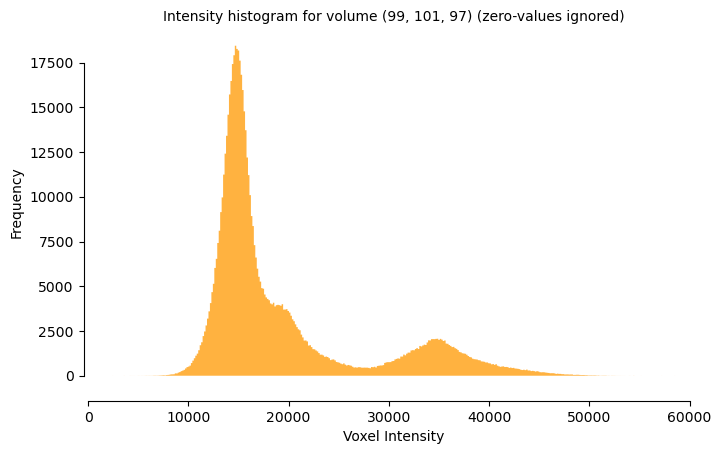

In [5]:
hist = qim3d.viz.histogram(vol, coarseness=10)

### Find data boundaries

The threshold exploration tool can be used to check the threshold levels to be used

In [6]:
qim3d.viz.threshold(vol, coarseness=4)

Subsampled volume has size 1.57% of the original volume.


In [7]:
MIN_INTESITY = 30000
MAX_INTENSITY = 60000

In [8]:
qim3d.viz.slicer(vol, value_min=MIN_INTESITY, value_max=MAX_INTENSITY)

interactive(children=(IntSlider(value=492, description='Slice', max=985), Output()), layout=Layout(align_items…

In [9]:
qim3d.viz.volumetric(vol)

Downsampled image for visualization, from (986, 1006, 968) to (256, 261, 251)


Output()

## Make binary volume

In [10]:
vol_binary = vol > MIN_INTESITY

In [11]:
qim3d.viz.slicer(vol_binary, image_size=6)

interactive(children=(IntSlider(value=492, description='Slice', max=985), Output()), layout=Layout(align_items…

In [ ]:
vol_closed = qim3d.morphology.closing(vol_binary, kernel=3, method='scipy.ndimage')

In [ ]:
qim3d.viz.slicer(vol_closed, image_size=6)

## Get largest component

In [ ]:
vol_cc = qim3d.segmentation.connected_components(vol_closed)

In [ ]:
color_map = qim3d.viz.colormaps.segmentation(len(vol_cc), style='bright')

In [ ]:
print(f"Total number of components: {len(vol_cc)}")

In [ ]:
qim3d.viz.slicer(vol_cc.labels, slice_axis=1, color_map=color_map, image_size=6)

In [ ]:
vol_largest_cc = vol_cc.filter_by_largest(1)

In [ ]:
qim3d.viz.slicer(vol_largest_cc, image_size=6)

In [ ]:
qim3d.viz.volumetric(vol_largest_cc)

## Local thickness

In [ ]:
# Some clean up
del vol_binary
del vol_closed
del vol_cc

In [ ]:
vol_sub = qim3d.operations.subsample(vol_largest_cc, coarseness=2)

In [ ]:
vol_sub.shape

In [ ]:
vol_lt = qim3d.processing.local_thickness(vol_sub, visualize=False)

In [ ]:
qim3d.viz.slicer(vol_lt, color_bar='volume', image_size=6)

In [ ]:
qim3d.viz.volumetric(vol_lt)

In [ ]:
hist_lt = qim3d.viz.histogram(vol_lt, coarseness=10)

In [ ]:
vol_thin = np.where(vol_lt >= 10, vol_lt, 0)

In [ ]:
qim3d.viz.slicer(vol_thin.astype(bool), color_bar='volume', image_size=6)